In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
data={
    'Country':['USA','Canada','France','UK','Germany','Australia'],
    'Latitude':[44.97, 62.40, 46.75, 54.01, 51.15, -25.45],
    'Longitude':[-103.77, -96.80, 2.40, -2.53, 10.40, 133.11],
    'Language':['English','English','French','English','German','English']
}
df=pd.DataFrame(data)
print(df)

     Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English


In [3]:
x=df[['Latitude','Longitude']]

<function matplotlib.pyplot.show(close=None, block=None)>

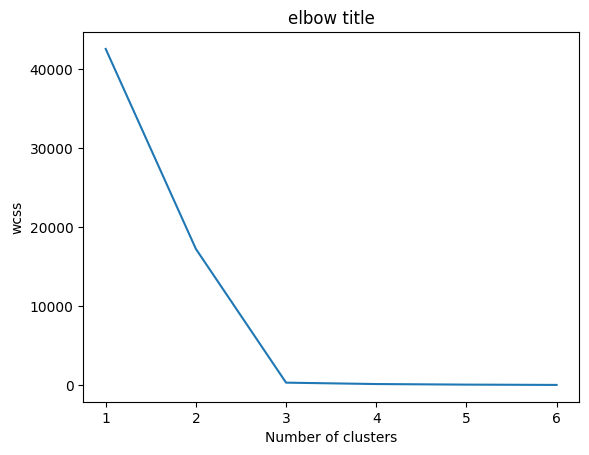

In [4]:
wcss=[]
for i in range(1,7):
  kmeans=KMeans(i)
  kmeans.fit(x)
  wcss_iter= kmeans.inertia_
  wcss.append(wcss_iter)
  number_clusters=range(1,7)
plt.plot(number_clusters,wcss)
plt.title('elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show

In [5]:
num_clusters= 3

In [6]:
kmeans= KMeans(n_clusters=num_clusters,
random_state=42)
kmeans.fit(x)


KMeans(n_clusters=3, random_state=42)

In [7]:
labels=kmeans.labels_

In [8]:
df['Cluster']=labels


In [9]:
print(df)

     Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        2
1     Canada     62.40     -96.80  English        2
2     France     46.75       2.40   French        0
3         UK     54.01      -2.53  English        0
4    Germany     51.15      10.40   German        0
5  Australia    -25.45     133.11  English        1


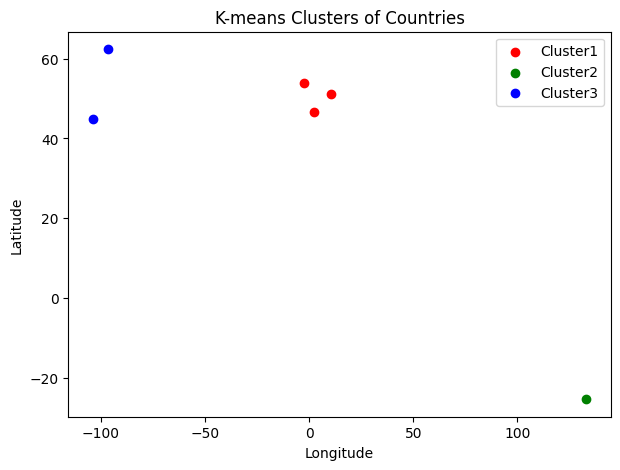

In [15]:
plt.figure(figsize=(7,5))
colors=['red','green','blue']
for i in range(num_clusters):
  cluster_data=df[df['Cluster']==i]
  plt.scatter(cluster_data['Longitude'],
cluster_data['Latitude'], color=colors[i], label='Cluster{}'.format(i+1))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clusters of Countries')
plt.legend()
plt.show()

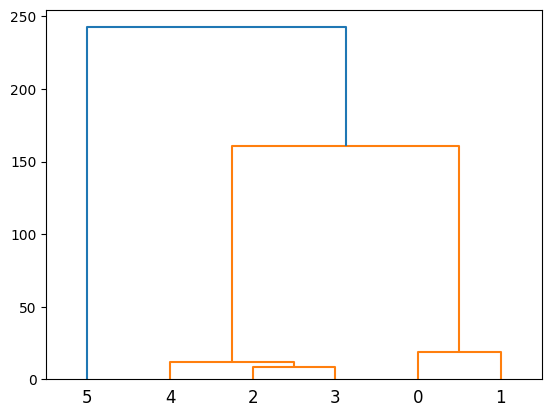

In [16]:
import scipy.cluster.hierarchy as shc
dendrogram=shc.dendrogram(shc.linkage(x,method='ward'))